In [129]:
import numpy as np
import cv2
import math
import random
import os, glob
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pydicom as pyd
import scipy as sci
import imageio
import tqdm

### SCR:CLAVICLES

In [92]:
scr_dir = '/home/alex/medical_project/fluro/scr/scratch'

In [93]:
left_clavicles_dir_1 = '/home/alex/medical_project/fluro/scr/scratch/fold1/masks/left clavicle'
right_clavicles_dir_1 = '/home/alex/medical_project/fluro/scr/scratch/fold1/masks/right clavicle'
left_clavicles_dir_2 = '/home/alex/medical_project/fluro/scr/scratch/fold2/masks/left clavicle'
right_clavicles_dir_2 = '/home/alex/medical_project/fluro/scr/scratch/fold2/masks/right clavicle'
mask_dir = '/home/alex/medical_project/fluro/clav_mask' # dir to save mask

In [94]:
left_clav_1 = glob.glob(left_clavicles_dir_1+'/*')
left_clav_2 = glob.glob(left_clavicles_dir_2+'/*')
right_clav_1 = glob.glob(right_clavicles_dir_1+'/*')
right_clav_2 = glob.glob(right_clavicles_dir_2+'/*')
left_clav = sorted(left_clav_1+left_clav_2)
right_clav = sorted(right_clav_1+right_clav_2)
len(left_clav), len(right_clav)

(247, 247)

In [54]:
for i in range(len(left_clav)):
    name = os.path.basename(left_clav[i]).split('.')[0]
    save_name = os.path.join(mask_dir, name+'.png')
    left_mask = Image.open(left_clav[i])
    right_mask = Image.open(right_clav[i])
    left_mask.paste(right_mask, (0,0), right_mask)
    left_mask.save(save_name)

In [95]:
mask_files = glob.glob(mask_dir+'/*png')
len(mask_files)

247

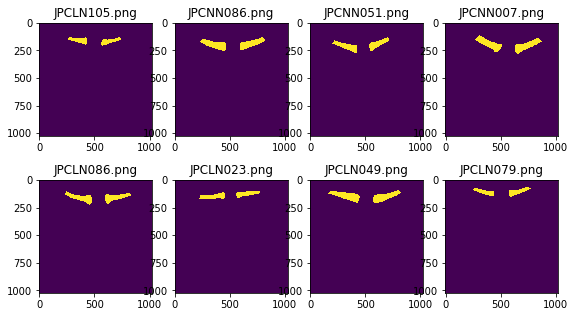

In [96]:
fig, axs = plt.subplots(2, 4, figsize=(9.3, 5.3))

for i in range(4):    
    axs[0, i].set_title(os.path.basename(mask_files[i]))
    axs[0, i].imshow(Image.open(mask_files[i]))    
    
for i in range(4):    
    axs[1, i].set_title(os.path.basename(mask_files[i+4]))
    axs[1, i].imshow(Image.open(mask_files[i+4]))

### JSRT 

In [167]:
jsrt_dir = '/home/alex/medical_project/fluro/All247images(1)/All247images'

In [169]:
fluro_files = glob.glob(jsrt_dir +'/*')
len(fluro_files)

247

In [160]:
# bad_file 122 mask and images!!!!!!!!
fluro_files[181]

'/home/alex/medical_project/fluro/All247images(1)/All247images/JPCLN122.IMG'

In [163]:
mask_dir = '/home/alex/medical_project/fluro/CLAVICLES/mask'
images = sorted(glob.glob(save_dir+'/*png'))
mask = sorted(glob.glob(mask_dir+'/*png'))
print (len(images), len(mask))

246 246


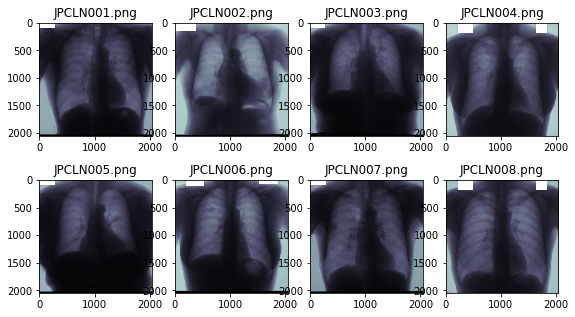

In [165]:
fig, axs = plt.subplots(2, 4, figsize=(9.3, 5.3))

for i in range(4):    
    axs[0, i].set_title(os.path.basename(images[i]))
    axs[0, i].imshow(Image.open(images[i]), cmap = 'bone')    
    
for i in range(4):    
    axs[1, i].set_title(os.path.basename(images[i+4]))
    axs[1, i].imshow(Image.open(images[i+4]), cmap = 'bone')

In [185]:
equailzed = sorted(glob.glob(os.path.join(eq_dir,'*.png')))

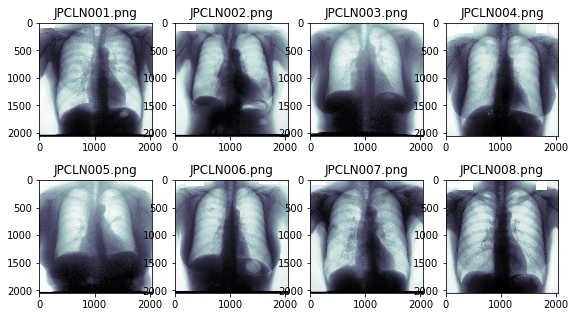

In [186]:
fig, axs = plt.subplots(2, 4, figsize=(9.3, 5.3))

for i in range(4):    
    axs[0, i].set_title(os.path.basename(equailzed[i]))
    axs[0, i].imshow(Image.open(equailzed[i]), cmap = 'bone')    
    
for i in range(4):    
    axs[1, i].set_title(os.path.basename(equailzed[i+4]))
    axs[1, i].imshow(Image.open(equailzed[i+4]), cmap = 'bone')

In [184]:
print(len(mask), len(images), len(equailzed))

246 246 246


In [197]:
def add_colored_mask(image, mask_image):
    image = cv2.imread(image)
    shape = image.shape
    mask_image = cv2.imread(mask_image)
    mask_image = cv2.resize(mask_image, (shape[0],shape[1]))
    mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)    
    mask = cv2.bitwise_and(mask_image, mask_image, mask=mask_image_gray)    
    mask_coord = np.where(mask!=[0,0,0])
    mask[mask_coord[0],mask_coord[1],:]=[255,0,0]
    ret = cv2.addWeighted(image, 0.7, mask, 0.3, 0)
    return Image.fromarray(ret)

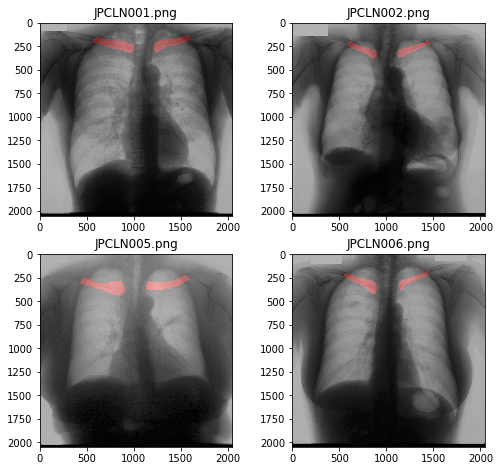

In [266]:
fig, axs = plt.subplots(2, 2, figsize=(8.3, 7.8))

for i in range(2):    
    axs[0, i].set_title(os.path.basename(equailzed[i]))
    axs[0, i].imshow(add_colored_mask(equailzed[i], mask[i]), cmap = 'bone')    
    
for i in range(2):    
    axs[1, i].set_title(os.path.basename(equailzed[i+4]))
    axs[1, i].imshow(add_colored_mask(equailzed[i+4],mask[i+4]) , cmap = 'bone')

## SCR:LUNGS

In [211]:
left_lungs_dir_1 = '/home/alex/medical_project/fluro/JSRT/scr/scratch/fold1/masks/left lung'
right_lungs_dir_1 = '/home/alex/medical_project/fluro/JSRT/scr/scratch/fold1/masks/right lung'
left_lungs_dir_2 = '/home/alex/medical_project/fluro/JSRT/scr/scratch/fold2/masks/left lung'
right_lungs_dir_2 = '/home/alex/medical_project/fluro/JSRT/scr/scratch/fold2/masks/right lung'
mask_dir = '/home/alex/medical_project/fluro/JSRT/mask/lungs' # dir to save mask

In [212]:
left_lung_1 = glob.glob(left_lungs_dir_1+'/*')
left_lung_2 = glob.glob(left_lungs_dir_2+'/*')
right_lung_1 = glob.glob(right_lungs_dir_1+'/*')
right_lung_2 = glob.glob(right_lungs_dir_2+'/*')
left_lung = sorted(left_lung_1+left_lung_2)
right_lung = sorted(right_lung_1+right_lung_2)
len(left_lung), len(right_lung)

(247, 247)

In [267]:
for i in tqdm.tqdm_notebook(range(len(left_lung))):
    name = os.path.basename(left_lung[i]).split('.')[0]
    save_name = os.path.join(mask_dir, name+'.png')
    left_mask = Image.open(left_lung[i])
    right_mask = Image.open(right_lung[i])
    left_mask.paste(right_mask, (0,0), right_mask)
    left_mask.save(save_name)

In [218]:
mask_files = sorted(glob.glob(mask_dir+'/*png'))
len(mask_files)

246

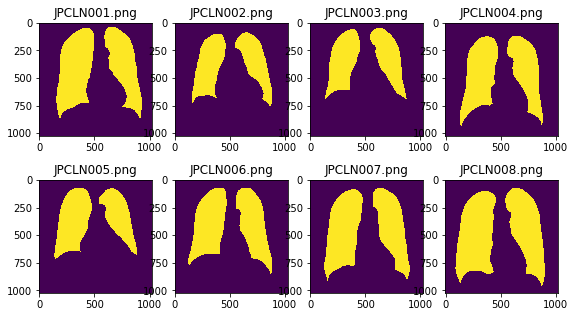

In [219]:
fig, axs = plt.subplots(2, 4, figsize=(9.3, 5.3))

for i in range(4):    
    axs[0, i].set_title(os.path.basename(mask_files[i]))
    axs[0, i].imshow(Image.open(mask_files[i]))    
    
for i in range(4):    
    axs[1, i].set_title(os.path.basename(mask_files[i+4]))
    axs[1, i].imshow(Image.open(mask_files[i+4]))

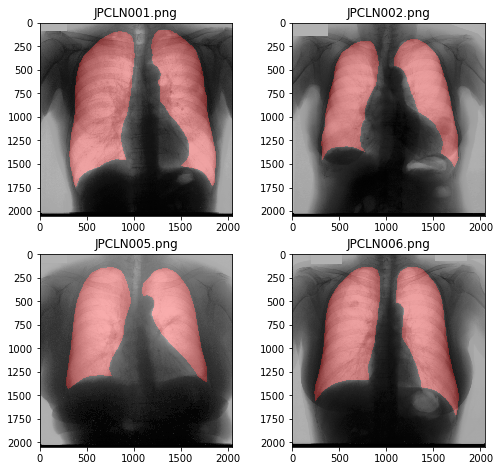

In [260]:
eq_dir = '/home/alex/medical_project/fluro/JSRT/images/jsrt_eq'
equailzed = sorted(glob.glob(os.path.join(eq_dir,'*.png')))
fig, axs = plt.subplots(2, 2, figsize=(8.3, 7.8))

for i in range(2):    
    axs[0, i].set_title(os.path.basename(equailzed[i]))
    axs[0, i].imshow(add_colored_mask(equailzed[i], mask_files[i]), cmap = 'bone')    
    
for i in range(2):    
    axs[1, i].set_title(os.path.basename(equailzed[i+4]))
    axs[1, i].imshow(add_colored_mask(equailzed[i+4],mask_files[i+4]) , cmap = 'bone')

### SCR:HEART

In [241]:
heart_dir = '/home/alex/medical_project/fluro/JSRT/mask/heart'
heart_masks = (glob.glob(os.path.join(heart_dir, '*.png')))
heart_masks[0]

'/home/alex/medical_project/fluro/JSRT/mask/heart/JPCLN001.png'

In [245]:
heart_masks[0]

'/home/alex/medical_project/fluro/JSRT/mask/heart/JPCLN001.png'

In [240]:
for i in tqdm.tqdm_notebook(heart_masks):
    name = os.path.basename(i).split('.')[0]
    save_path = os.path.join(heart_dir, name+'.png')
    file = Image.open(i)
    file.save(save_path)

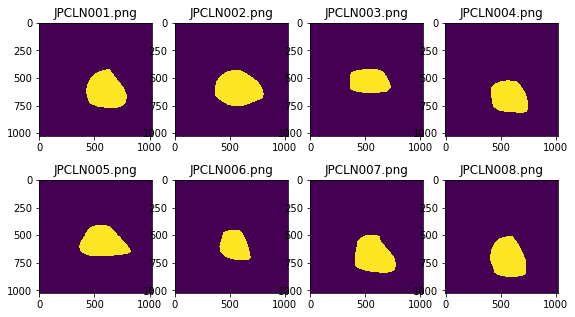

In [242]:
fig, axs = plt.subplots(2, 4, figsize=(9.3, 5.3))

for i in range(4):    
    axs[0, i].set_title(os.path.basename(heart_masks[i]))
    axs[0, i].imshow(Image.open(heart_masks[i]))    
    
for i in range(4):    
    axs[1, i].set_title(os.path.basename(heart_masks[i+4]))
    axs[1, i].imshow(Image.open(heart_masks[i+4]))

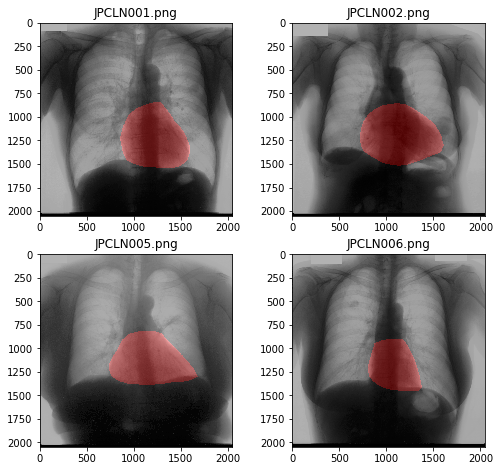

In [259]:
fig, axs = plt.subplots(2, 2, figsize=(8.3, 7.8))

for i in range(2):    
    axs[0, i].set_title(os.path.basename(equailzed[i]))
    axs[0, i].imshow(add_colored_mask(equailzed[i], heart_masks[i]), cmap = 'bone')    
    
for i in range(2):    
    axs[1, i].set_title(os.path.basename(equailzed[i+4]))
    axs[1, i].imshow(add_colored_mask(equailzed[i+4],heart_masks[i+4]) , cmap = 'bone')